In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
import joblib


   Unnamed: 0  Age  Gender  Medical_History  Smoking    BMI  Sporting  \
0           0   63       1                1        0  32.25         1   
1           1   49       1                0        0  23.10         1   
2           2   68       1                1        1  31.24         0   
3           3   48       0                0        0  37.30         1   
4           4   80       1                1        0  18.13         0   

   Systolic_BP  Diastolic_BP  Heart_Rate  Hypertension_Tests  
0          113            78          65                   0  
1          155            95          95                   1  
2          177            77          92                   1  
3          124            81          56                   0  
4          179            92          77                   1  
        Unnamed: 0           Age        Gender  Medical_History       Smoking  \
count  10000.00000  10000.000000  10000.000000     10000.000000  10000.000000   
mean    4999.50000   

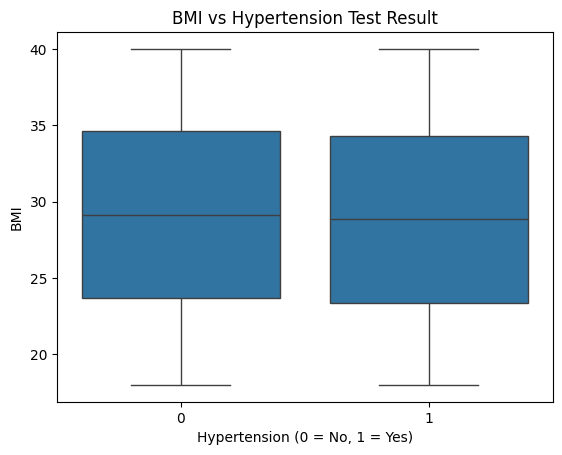

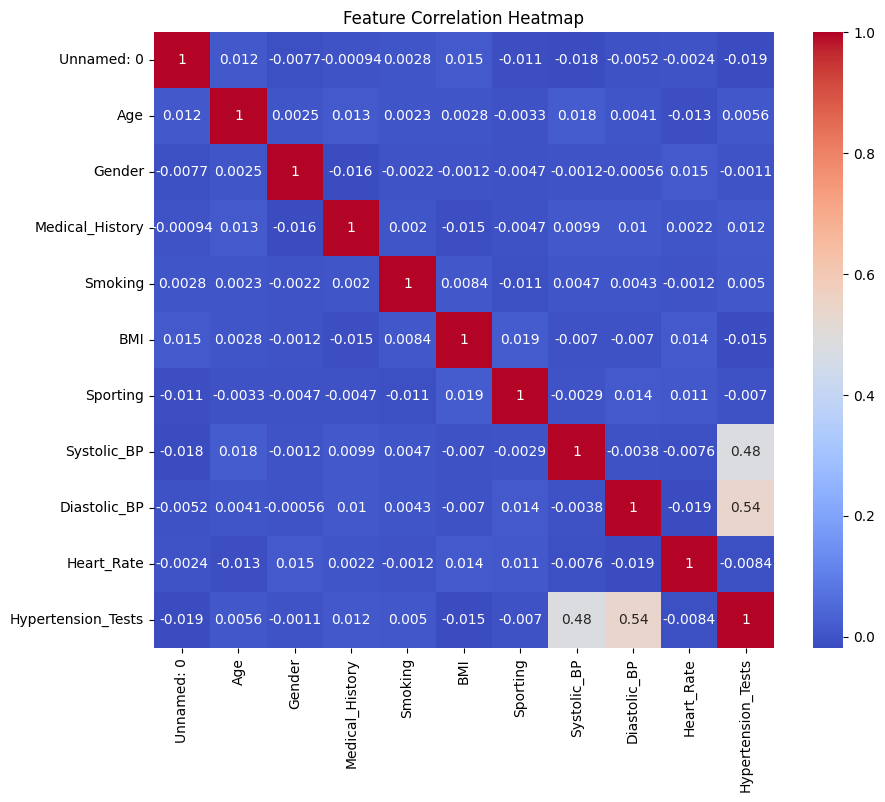

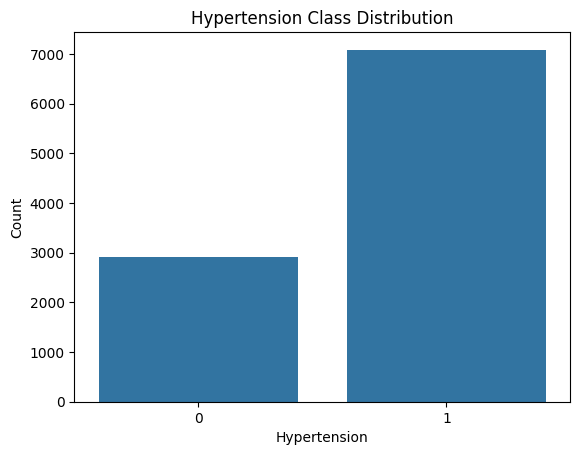


LogisticRegression Accuracy: 0.78

RandomForest Accuracy: 1.00

XGBoost Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       583
           1       1.00      1.00      1.00      1417

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



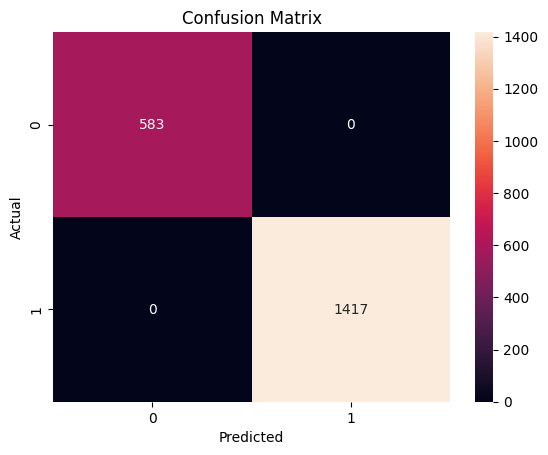

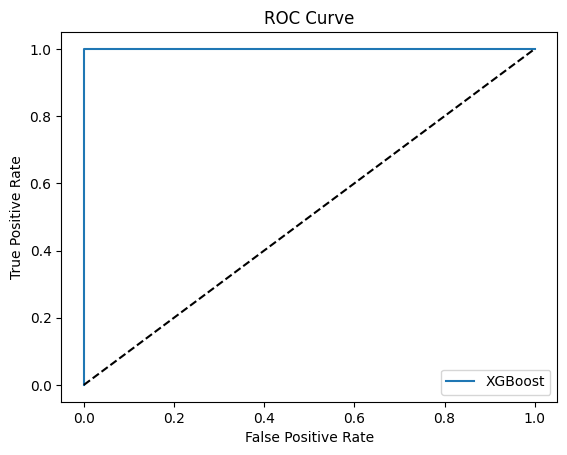

Model saved successfully.


In [3]:
import os
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import joblib


# 2. Load Dataset
df = pd.read_csv('data/hypertension.csv')
print(df.head())

# 3. Encode Categorical Columns
df_encoded = df.copy()
categorical_cols = ['Gender', 'Medical_History', 'Smoking', 'Sporting']

le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# 4. EDA and Visualizations
print(df_encoded.describe())

sns.boxplot(data=df_encoded, x='Hypertension_Tests', y='BMI')
plt.title('BMI vs Hypertension Test Result')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

sns.countplot(data=df_encoded, x='Hypertension_Tests')
plt.title('Hypertension Class Distribution')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()

# 5. Preprocessing (no scaler)
X = df_encoded.drop('Hypertension_Tests', axis=1)
y = df_encoded['Hypertension_Tests']

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 7. Train Models
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# 8. Evaluate Best Model (XGBoost)
best_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

X = df.drop('Hypertension_Tests', axis=1)
y = df['Hypertension_Tests']
model.fit(X, y)

with open("hypertension_model.pkl", "wb") as f:
    pickle.dump(model, f)


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='XGBoost')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 9. Save Model Only
try:
    joblib.dump(best_model, 'models/hypertension_model.pkl')
    print("Model saved successfully.")
except Exception as e:
    print(f"Error saving model: {e}")